In [95]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
work_dir = r'C:\Users\tangc\OneDrive\Desktop\Files\HW\Datathon'
print(os.listdir(work_dir))

['.ipynb_checkpoints', '1', '2', 'EDA.ipynb', 'Finite_Element_Model.png', 'Introduction.ipynb', 'Joined_Melt_Pool', 'Meltpool.png', 'meltpool_1_nn.ipynb', 'meltpool_2_nn.ipynb', 'Merging data.ipynb', 'MergingData_TempPrediction.ipynb', 'my_logs', 'prediction_submission.csv', 'README.docx', 'saved_models', 'saved_nn_models', 'temperature_2_nn.ipynb']


# Task 1

In [77]:
full_df_temp_1 = pd.read_csv(work_dir + r"\1\Training\full_temperature.csv").drop(["Unnamed: 0"], axis=1)

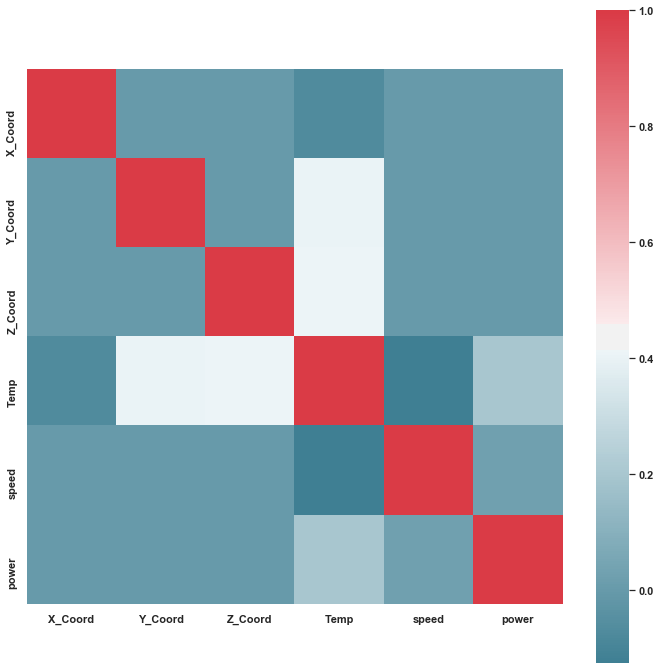

In [78]:
corr = full_df_temp_1.corr()
sns.set(rc={'figure.figsize':(12,12)})
corr_plot = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

In [60]:
full_df_temp_1_grouped = pd.DataFrame({'Avg_Temp': full_df_temp_1.groupby(['speed','power'])["Temp"].mean()}).reset_index()

In [66]:
full_df_temp_1_grouped.head()

,speed,power,Avg_Temp
0,0.6,100,0.011424
1,0.6,125,0.013711
2,0.6,150,0.015957
3,0.6,175,0.018122
4,0.6,200,0.020196


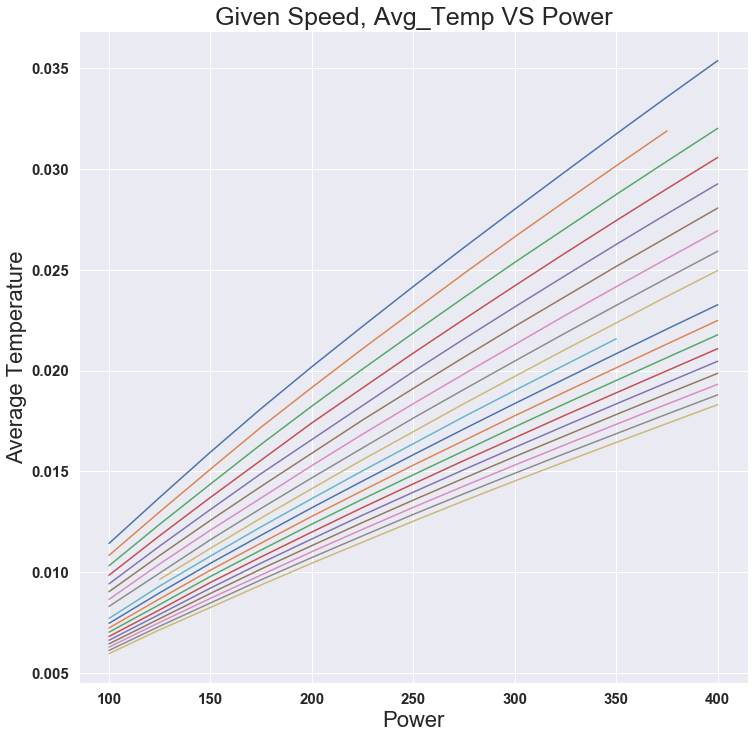

In [86]:
for speed in full_df_temp_1_grouped["speed"].unique():
    df_temp = full_df_temp_1_grouped[full_df_temp_1_grouped["speed"] == speed]
    plt.plot("power", "Avg_Temp", data=df_temp)
del df_temp
plt.title("Given Speed, Avg_Temp VS Power", fontsize=25)
plt.xlabel("Power", fontsize=22)
plt.ylabel("Average Temperature", fontsize=22)
plt.tick_params(labelsize=15)
plt.show()

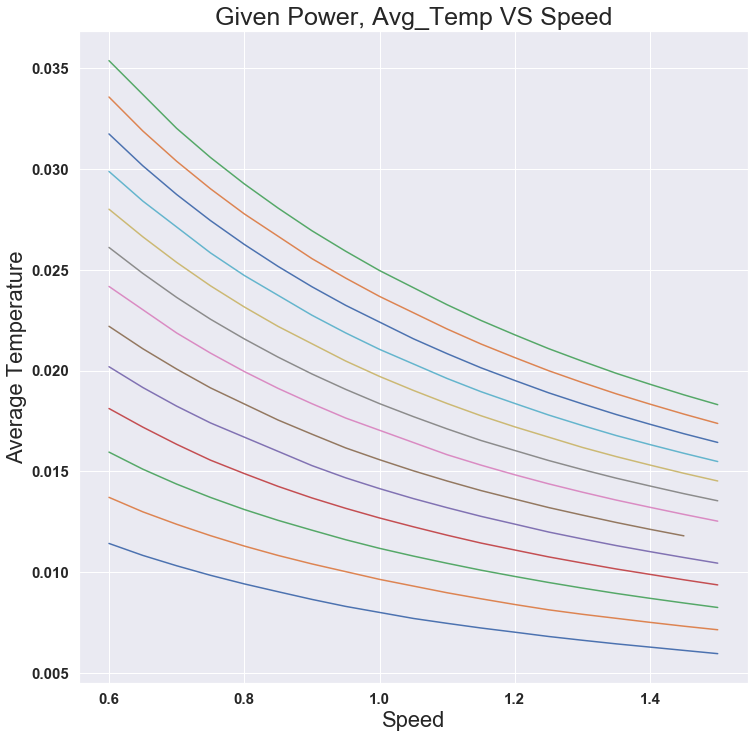

In [87]:
for power in full_df_temp_1_grouped["power"].unique():
    df_temp = full_df_temp_1_grouped[full_df_temp_1_grouped["power"] == power]
    plt.plot("speed", "Avg_Temp", data=df_temp)
del df_temp
plt.title("Given Power, Avg_Temp VS Speed", fontsize=25)
plt.xlabel("Speed", fontsize=22)
plt.ylabel("Average Temperature", fontsize=22)
plt.tick_params(labelsize=15)
plt.show()

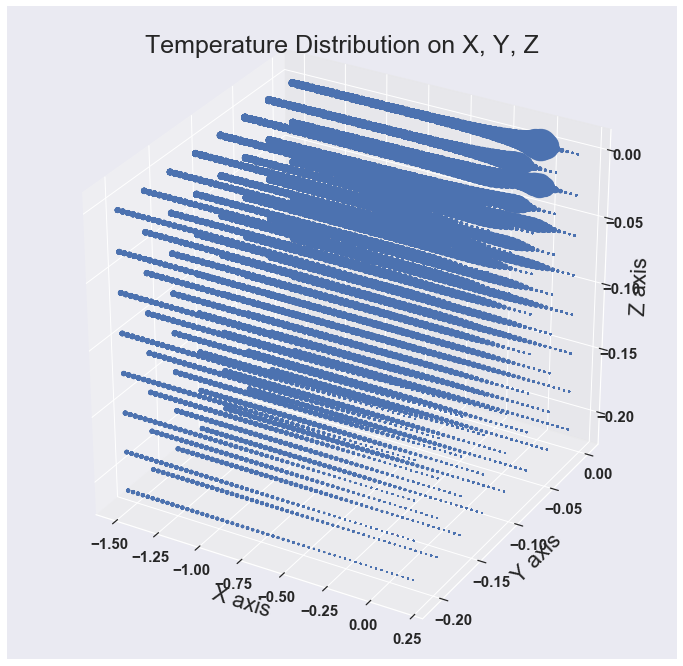

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = full_df_temp_1['X_Coord'], ys = full_df_temp_1['Y_Coord'], zs = full_df_temp_1['Z_Coord'], 
                            s = full_df_temp_1['Temp'] * 1000)
plt.title("Temperature Distribution on X, Y, Z", fontsize=25)
plt.tick_params(labelsize=15)
ax.set_xlabel('X axis', fontsize=22)
ax.set_ylabel('Y axis', fontsize=22)
ax.set_zlabel('Z axis', fontsize=22)
plt.show()

In [109]:
meltpool_training = pd.read_csv(os.path.join(work_dir, '1/Validation', 'Melt_Pool_Dimensions.csv'), index_col = False)

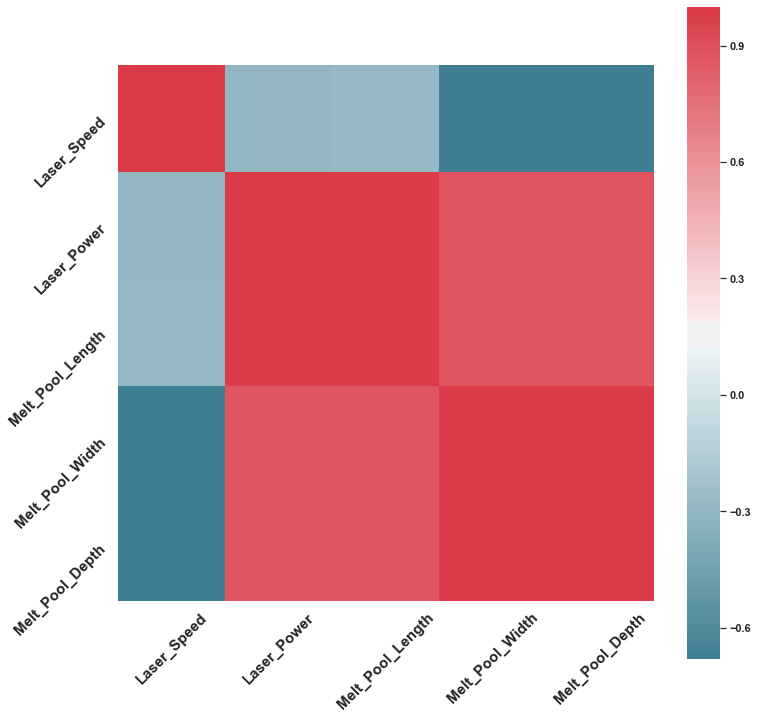

In [114]:
corr = meltpool_training.corr()
sns.set(rc={'figure.figsize':(12,12)})
corr_plot = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)
plt.tick_params(labelsize=15, labelrotation=45)
plt.show()

# Task 2

In [16]:
df_temp_2_50 = pd.read_csv(work_dir + r"\2\Training\random_samples_temp_50.csv").drop(["Unnamed: 0"], axis=1)

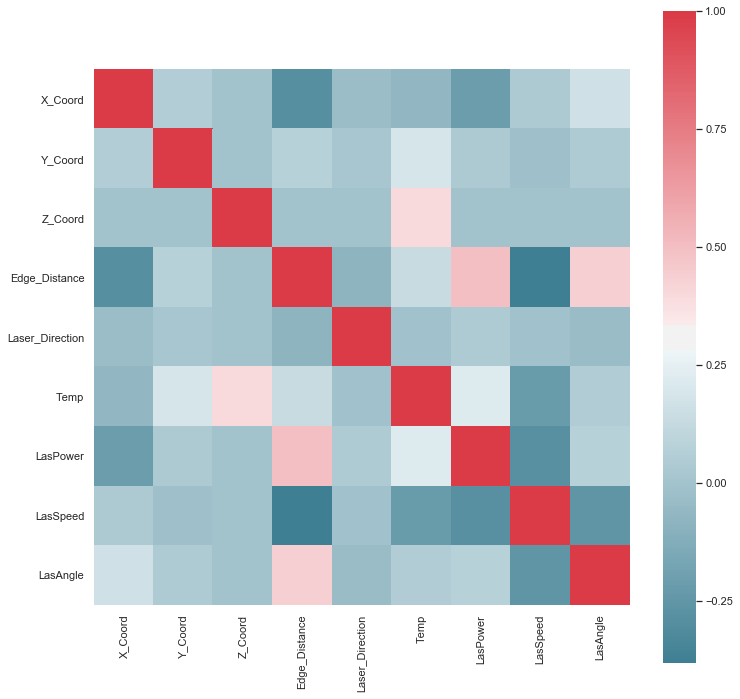

In [19]:
corr = df_temp_2_50.corr()
sns.set(rc={'figure.figsize':(12,12)})
corr_plot = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

In [116]:
df_temp_2_50.head()

,X_Coord,Y_Coord,Z_Coord,Edge_Distance,Laser_Direction,Temp,LasPower,LasSpeed,LasAngle
0,0.176231,-0.200626,0.00,0.0658,-1,0.00091,200.0,0.6,70
1,0.176231,-0.200626,-0.03,0.0658,-1,0.00088,200.0,0.6,70
2,0.176231,-0.200626,-0.06,0.0658,-1,0.00078,200.0,0.6,70
3,0.176231,-0.200626,-0.09,0.0658,-1,0.00072,200.0,0.6,70
4,0.176231,-0.200626,-0.12,0.0658,-1,0.00068,200.0,0.6,70


In [120]:
df_temp_2_50 = df_temp_2_50.assign(log_Temp=lambda x: np.log(x.Temp))

In [134]:
df_temp_2_50_grouped = pd.DataFrame({"Avg_log_Temp": df_temp_2_50.groupby("Edge_Distance")["log_Temp"].mean()}).reset_index()
df_temp_2_50_grouped.head()

,Edge_Distance,Avg_log_Temp
0,0.0600,-4.902200
1,0.0608,-6.188910
2,0.0613,-6.525258
3,0.0634,-6.044743
4,0.0650,-5.802250


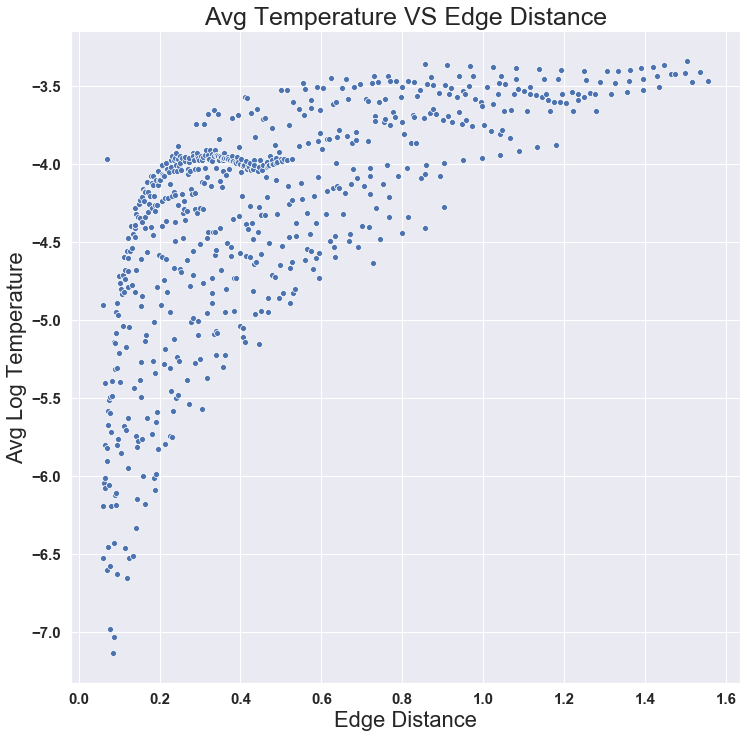

In [155]:
ax = sns.scatterplot(x="Edge_Distance", y="Avg_log_Temp", data=df_temp_2_50_grouped)
plt.title("Avg Temperature VS Edge Distance", fontsize=25)
plt.xlabel("Edge Distance", fontsize=22)
plt.ylabel("Avg Log Temperature", fontsize=22)
plt.tick_params(labelsize=15)
# plt.xticks([], [])
plt.show()

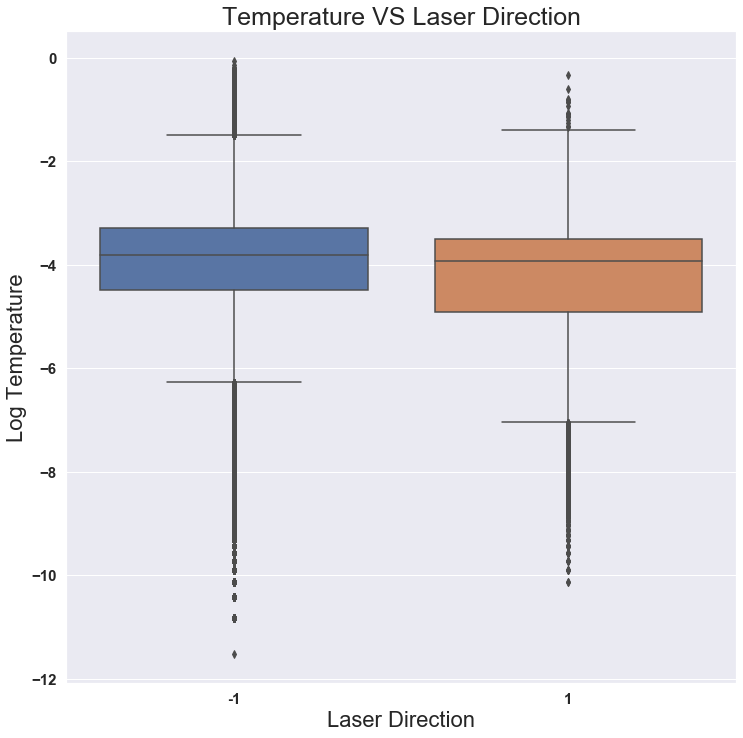

In [129]:
ax = sns.boxplot(x="Laser_Direction", y="log_Temp", data=df_temp_2_50)
plt.title("Temperature VS Laser Direction", fontsize=25)
plt.xlabel("Laser Direction", fontsize=22)
plt.ylabel("Log Temperature", fontsize=22)
plt.tick_params(labelsize=15)
plt.show()

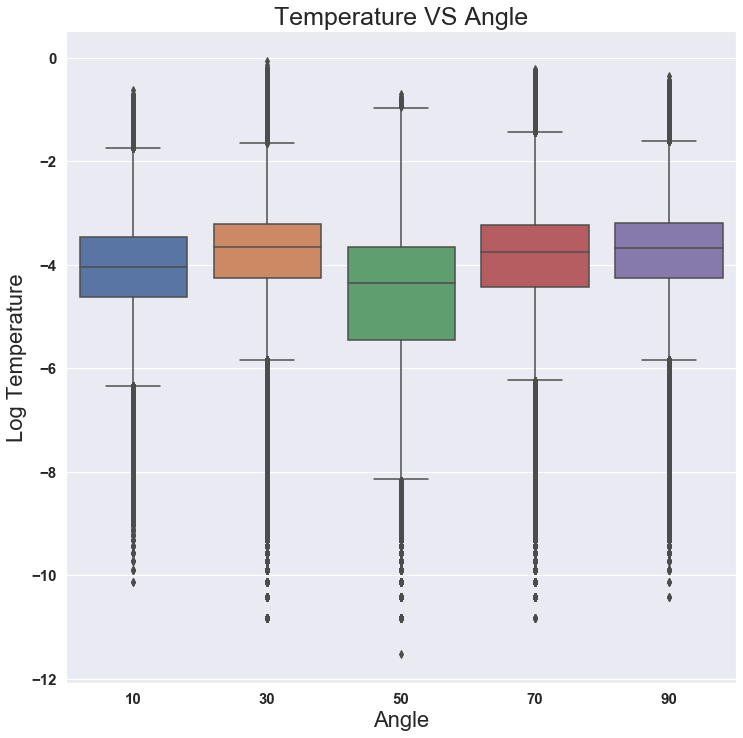

In [130]:
ax = sns.boxplot(x="LasAngle", y="log_Temp", data=df_temp_2_50)
plt.title("Temperature VS Angle", fontsize=25)
plt.xlabel("Angle", fontsize=22)
plt.ylabel("Log Temperature", fontsize=22)
plt.tick_params(labelsize=15)
plt.show()

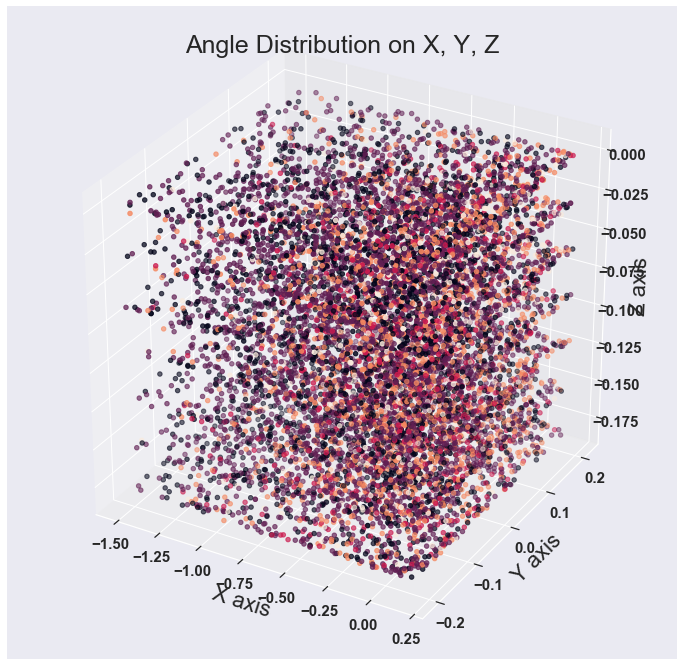

In [162]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
df_temp_2_50_sub = df_temp_2_50.loc[np.random.randint(0, df_temp_2_50.shape[0], 10000), :]
ax.scatter(xs = df_temp_2_50_sub['X_Coord'], ys = df_temp_2_50_sub['Y_Coord'], zs = df_temp_2_50_sub['Z_Coord'], 
                            c = df_temp_2_50_sub['LasAngle'] * 1000)
plt.title("Angle Distribution on X, Y, Z", fontsize=25)
plt.tick_params(labelsize=15)
ax.set_xlabel('X axis', fontsize=22)
ax.set_ylabel('Y axis', fontsize=22)
ax.set_zlabel('Z axis', fontsize=22)
plt.show()